We have stored the NAAMES data to Azure Cloud Storage and to read it we will use the Python API. 

ifcb storage account -> naames container -> NAAMES_ml folder

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
import imageio

In [3]:
import getpass

In [4]:
from sklearn.preprocessing import LabelBinarizer

In [5]:
import azure.storage.blob

In [6]:
import sys
sys.path.append('../')

In [7]:
pip install -r ../requirements.txt

  Using cached opencv_python_headless-4.5.5.62-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (47.7 MB)
Note: you may need to restart the kernel to use updated packages.


In [8]:
import imp

In [9]:
import data_utils as du

In [86]:
imp.reload(du)

<module 'data_utils' from '/home/jovyan/ifcb-utopia/ml-workflow/notebooks/../data_utils.py'>

In [10]:
# here we connect to the Azure blob storage
connection_string = getpass.getpass()

 ···················································································································································································


In [11]:
container_client = azure.storage.blob.ContainerClient.from_connection_string(
    connection_string, container_name="naames"
)

In [12]:
# we limit to a subfolder to test the functionality
#blobs_list = container_client.list_blobs(name_starts_with='NAAMES_ml/D20151102T161705_IFCB107')

In [13]:
container_name = 'naames'
account_name = 'ifcb'

In [14]:
url_prefix = f"https://{account_name}.blob.core.windows.net/{container_name}/"

In [15]:
url_prefix

'https://ifcb.blob.core.windows.net/naames/'

In [16]:
csv_url = url_prefix + 'image-file-directory.csv'

In [17]:
inventory_df = pd.read_csv(csv_url)
inventory_df

,file_name,class_raw,high_group,missing_high_group,id,lat,long,Area,Biovolume,ConvexArea,...,ScatInt,FluoInt,ScatPeak,FluoPeak,NumberOfROIinTrigger,missing_meta_data,ESDA_exclude,excluded_1,set,binary_label
0,IFCB107D20151104T112022P00433_Unicellular.png,Unicellular,Other,False,IFCB107D20151104T112022P00433,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
1,IFCB107D20151104T114135P00194_Unicellular.png,Unicellular,Other,False,IFCB107D20151104T114135P00194,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
2,IFCB107D20151104T114135P00246_Unicellular.png,Unicellular,Other,False,IFCB107D20151104T114135P00246,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
3,IFCB107D20151104T124515P00027_Unicellular.png,Unicellular,Other,False,IFCB107D20151104T124515P00027,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
4,IFCB107D20151105T174918P00074_Dinophyceae.png,Dinophyceae,Dinoflagellate,False,IFCB107D20151105T174918P00074,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998895,IFCB107D20180412T010113P00020_Ceratium.png,Ceratium,Dinoflagellate,False,IFCB107D20180412T010113P00020,40.348,-68.296,1507.093426,20001.839825,2501.816609,...,1.09682,0.36801,3.33541,1.37789,1.0,False,False,0,train,plankton
1998896,IFCB107D20180412T012434P00137_Ditylum.png,Ditylum,Diatom,False,IFCB107D20180412T012434P00137,40.324,-68.387,4811.591696,91203.058213,6707.612457,...,3.49742,1.77298,3.35693,3.31523,1.0,False,False,0,train,plankton
1998897,IFCB107D20180412T012434P00348_Ditylum.png,Ditylum,Diatom,False,IFCB107D20180412T012434P00348,40.324,-68.387,2446.626298,30443.529921,3317.560554,...,2.46922,0.90272,3.35900,2.21282,1.0,False,False,0,train,plankton
1998898,IFCB107D20180412T021117P00330_Ceratium.png,Ceratium,Dinoflagellate,False,IFCB107D20180412T021117P00330,40.273,-68.571,1500.951557,19808.704267,2787.802768,...,0.61201,0.04541,2.85538,0.37142,1.0,False,False,0,train,plankton


In [18]:
# subsample the full dataframe for workflow testing
df_subsample = inventory_df.iloc[:10000,]

In [19]:
df_subsample

,file_name,class_raw,high_group,missing_high_group,id,lat,long,Area,Biovolume,ConvexArea,...,ScatInt,FluoInt,ScatPeak,FluoPeak,NumberOfROIinTrigger,missing_meta_data,ESDA_exclude,excluded_1,set,binary_label
0,IFCB107D20151104T112022P00433_Unicellular.png,Unicellular,Other,False,IFCB107D20151104T112022P00433,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
1,IFCB107D20151104T114135P00194_Unicellular.png,Unicellular,Other,False,IFCB107D20151104T114135P00194,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
2,IFCB107D20151104T114135P00246_Unicellular.png,Unicellular,Other,False,IFCB107D20151104T114135P00246,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
3,IFCB107D20151104T124515P00027_Unicellular.png,Unicellular,Other,False,IFCB107D20151104T124515P00027,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
4,IFCB107D20151105T174918P00074_Dinophyceae.png,Dinophyceae,Dinoflagellate,False,IFCB107D20151105T174918P00074,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,IFCB107D20151108T183117P00255_Unicellular.png,Unicellular,Other,False,IFCB107D20151108T183117P00255,43.3728,-59.4867,38.840830,150.669198,46.626298,...,0.00210,0.00063,0.01105,0.08894,1.0,False,True,1,train,plankton
9996,IFCB107D20151108T183117P00257_Unicellular.png,Unicellular,Other,False,IFCB107D20151108T183117P00257,43.3728,-59.4867,35.726644,137.160925,36.418685,...,0.00189,-0.00024,0.01096,0.04473,1.0,False,True,1,train,plankton
9997,IFCB107D20151108T183117P00266_Unicellular.png,Unicellular,Other,False,IFCB107D20151108T183117P00266,43.3728,-59.4867,27.335640,65.335489,34.083045,...,0.00178,-0.00181,0.01107,0.13939,1.0,False,True,1,test,plankton
9998,IFCB107D20151108T183117P00268_Unicellular.png,Unicellular,Other,False,IFCB107D20151108T183117P00268,43.3728,-59.4867,36.332180,132.045366,37.716263,...,0.00313,0.00891,0.04725,0.31958,1.0,False,True,1,train,plankton


## create png_path column and 3-column dataframe

In [20]:
# add a column of the png path to the df dataframe
df_subsample['png_path'] = df_subsample['id'].apply(lambda row : du.buildPNGsName(row))

/tmp/ipykernel_361/1727142688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subsample['png_path'] = df_subsample['id'].apply(lambda row : du.buildPNGsName(row))


In [21]:
# create a dataframe with just the columns of png_path and high_group
df_files_labels = df_subsample[['png_path', 'high_group']]

In [24]:
# add a column called full_path 
df_files_labels['full_path'] = df_files_labels['png_path'].apply(lambda row : os.path.join(url_prefix,'NAAMES_ml', row))

/tmp/ipykernel_361/1825214936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_files_labels['full_path'] = df_files_labels['png_path'].apply(lambda row : os.path.join(url_prefix,'NAAMES_ml', row))


In [23]:
# THIS IS A TEST FOR SPEED OF GENERATOR ON LOCAL FILES VS BLOB
# add a column called full_path
#df_files_labels['full_path'] = df_files_labels['png_path'].apply(lambda row : os.path.join('..', row))

/tmp/ipykernel_361/3276058663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_files_labels['full_path'] = df_files_labels['png_path'].apply(lambda row : os.path.join('..', row))


In [25]:
df_files_labels

,png_path,high_group,full_path
0,D20151104T112022_IFCB107/IFCB107D20151104T1120...,Other,https://ifcb.blob.core.windows.net/naames/NAAM...
1,D20151104T114135_IFCB107/IFCB107D20151104T1141...,Other,https://ifcb.blob.core.windows.net/naames/NAAM...
2,D20151104T114135_IFCB107/IFCB107D20151104T1141...,Other,https://ifcb.blob.core.windows.net/naames/NAAM...
3,D20151104T124515_IFCB107/IFCB107D20151104T1245...,Other,https://ifcb.blob.core.windows.net/naames/NAAM...
4,D20151105T174918_IFCB107/IFCB107D20151105T1749...,Dinoflagellate,https://ifcb.blob.core.windows.net/naames/NAAM...
...,...,...,...
9995,D20151108T183117_IFCB107/IFCB107D20151108T1831...,Other,https://ifcb.blob.core.windows.net/naames/NAAM...
9996,D20151108T183117_IFCB107/IFCB107D20151108T1831...,Other,https://ifcb.blob.core.windows.net/naames/NAAM...
9997,D20151108T183117_IFCB107/IFCB107D20151108T1831...,Other,https://ifcb.blob.core.windows.net/naames/NAAM...
9998,D20151108T183117_IFCB107/IFCB107D20151108T1831...,Other,https://ifcb.blob.core.windows.net/naames/NAAM...


In [26]:
df_files_labels.full_path.iloc[0]

'https://ifcb.blob.core.windows.net/naames/NAAMES_ml/D20151104T112022_IFCB107/IFCB107D20151104T112022P00433.png'

In [27]:
# -- 
# one hot encode the labels 

lb = LabelBinarizer()
labels = set(df_files_labels.high_group)
lb.fit(list(labels))
batch_size = 100

In [28]:
ls ..

D20151107T120416_IFCB107/  README.md     data_utils.py  requirements.txt
LICENSE                    __pycache__/  notebooks/     untitled.py


In [29]:
imageio.imread(df_files_labels.full_path.iloc[0])

Array([[199, 198, 197, ..., 198, 198, 198],
       [197, 199, 195, ..., 198, 198, 200],
       [200, 200, 203, ..., 199, 194, 196],
       ...,
       [203, 199, 204, ..., 200, 195, 203],
       [203, 200, 201, ..., 197, 198, 198],
       [201, 201, 200, ..., 199, 199, 200]], dtype=uint8)

In [30]:
# -- 
# instantiate generators 

imageGen = du.image_generator(df_files_labels, batch_size, lb)

In [31]:
imageio.imread('https://ifcb.blob.core.windows.net/naames/NAAMES_ml/D20151107T120416_IFCB107/IFCB107D20151107T120416P00874.png')

Array([[197, 201, 199, ..., 197, 198, 201],
       [199, 199, 198, ..., 196, 194, 198],
       [202, 199, 195, ..., 198, 200, 196],
       ...,
       [202, 199, 196, ..., 202, 204, 196],
       [201, 201, 203, ..., 203, 199, 197],
       [200, 201, 200, ..., 198, 196, 202]], dtype=uint8)

In [33]:
%%time
output = next(imageGen)

CPU times: user 1.75 s, sys: 117 ms, total: 1.87 s
Wall time: 1min 5s


In [35]:
output[0].shape

(100, 128, 128, 1)

In [37]:
output[1].shape

(100, 14)

In [13]:
#account_key = input('input_account_key')

In [21]:
# attach the azure url
#blob_urls = (f"https://{account_name}.blob.core.windows.net/{container_name}/{blob.name}" for blob in blobs_list)

In [20]:
#%%time
#dataset = []
#failed_urls = []
#for blob_url in blob_urls:
    # print(blob_url)
    # select 'png'
#    if 'png' in blob_url:
#        try:
#            image = imageio.imread(blob_url)
#            dataset.append(image)
#        except Exception as e:
#            failed_urls.append(blob_url)
#            pass
        

In [22]:
#print(failed_urls)

In [23]:
#len(dataset)

In [25]:
# show an image

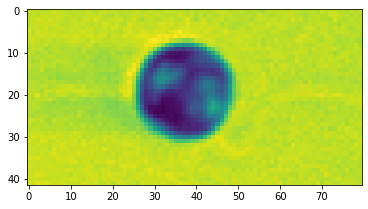

In [43]:
plt.imshow(dataset[0])

In [30]:
dataset[0]

In [15]:
image = imageio.imread('https://ifcb.blob.core.windows.net/naames/NAAMES_ml/D20151102T161705_IFCB107/IFCB107D20151102T161705P00002.png')

In [17]:
image

Array([[203, 200, 200, ..., 200, 198, 200],
       [199, 200, 198, ..., 195, 199, 194],
       [201, 201, 205, ..., 200, 197, 198],
       ...,
       [205, 203, 207, ..., 197, 197, 197],
       [205, 203, 203, ..., 200, 199, 196],
       [207, 202, 209, ..., 201, 198, 199]], dtype=uint8)